In [1]:
from functions import VISHLESHAN
from process import PHOTOMICS
import pandas as pd
import nnet_survival
from sklearn.model_selection import train_test_split
from keras.models import load_model
from numpy.random import seed
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Using TensorFlow backend.


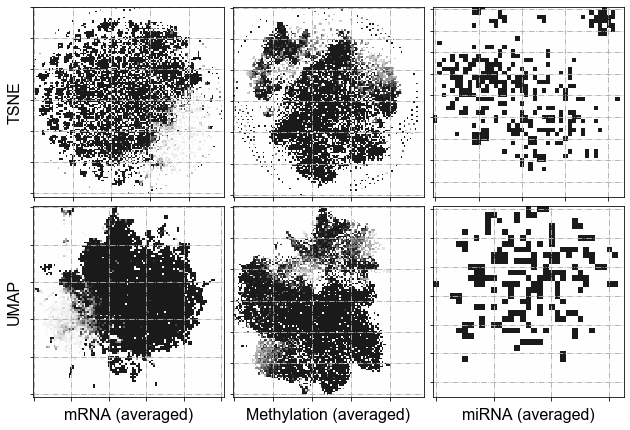

In [4]:
# SECTION I: DISPLAY GENERATED IMAGES

# MRNA+METH

plt.rc('font', family='Arial')
fig, ax = plt.subplots(2, 3, figsize=(8,10))
#fig.suptitle('Differential gene expression among dichotomized patients', x = 0.68, fontsize = 14, fontweight = 1000)

listdir_tsne_mrna = [elem.strip().split('.')[0] for elem in os.listdir('data/data_px/tsne_mrna_datapx')]
listdir_tsne_meth = [elem.strip().split('.')[0] for elem in os.listdir('data/data_px/tsne_meth_datapx')]
listdir_tsne_mirna = [elem.strip().split('.')[0] for elem in os.listdir('data/data_px/tsne_mirna_datapx')]
listdir_umap_mrna = [elem.strip().split('.')[0] for elem in os.listdir('data/data_px/umap_mrna_datapx')]
listdir_umap_meth = [elem.strip().split('.')[0] for elem in os.listdir('data/data_px/umap_meth_datapx')]
listdir_umap_mirna = [elem.strip().split('.')[0] for elem in os.listdir('data/data_px/umap_mirna_datapx')]

a1 = ax[0,0].imshow(obj_analysis.average_pix(listdir_tsne_mrna, 'data/data_px/tsne_mrna_datapx/'), cmap = 'RdGy', interpolation='None')
a2 = ax[0,1].imshow(obj_analysis.average_pix(listdir_tsne_meth, 'data/data_px/tsne_meth_datapx/'), cmap = 'RdGy', interpolation='None')
a3 = ax[0,2].imshow(obj_analysis.average_pix(listdir_tsne_mirna, 'data/data_px/tsne_mirna_datapx/'), cmap = 'RdGy', interpolation='None')

b1 = ax[1,0].imshow(obj_analysis.average_pix(listdir_umap_mrna, 'data/data_px/umap_mrna_datapx/'), cmap = 'RdGy', interpolation='None')
b2 = ax[1,1].imshow(obj_analysis.average_pix(listdir_umap_meth, 'data/data_px/umap_meth_datapx/'), cmap = 'RdGy', interpolation='None')
b3 = ax[1,2].imshow(obj_analysis.average_pix(listdir_umap_mirna, 'data/data_px/umap_mirna_datapx/'), cmap = 'RdGy', interpolation='None')

fig.subplots_adjust(right= 1.15)

for axis in ax.flatten():
    #axis.set_xlim(0,130)
    #axis.set_ylim(0,130)
    axis.set_yticklabels([])
    axis.set_xticklabels([])
    axis.grid(linestyle='-.', linewidth=0.9)
    axis.grid(linestyle='-.', linewidth=0.9)
    axis.grid(linestyle='-.', linewidth=0.9)

ax[0,0].set_ylabel('TSNE', fontsize=16)
ax[1,0].set_ylabel('UMAP', fontsize=16)
ax[1,0].set_xlabel('mRNA (averaged)', fontsize=16)
ax[1,1].set_xlabel('Methylation (averaged)', fontsize=16)
ax[1,2].set_xlabel('miRNA (averaged)', fontsize=16)

a1.set_clim(-0.3,0.3)
a2.set_clim(-0.3,0.3)
a3.set_clim(-0.3,0.3)
b1.set_clim(-0.3,0.3)
b2.set_clim(-0.3,0.3)
b3.set_clim(-0.3,0.3)

plt.subplots_adjust(wspace=0.05, hspace=-0.42)
#fig.colorbar(im2, cax=cbar_ax)

#fig.savefig('plots/transformed_feats.png', dpi = 1200, bbox_inches='tight')

In [131]:
# SECTION II: ANALYSE SIMULATION RESULTS

obj_analysis = VISHLESHAN()
# tsne_PH_results = obj_analysis.makeDict('simulation_results/tsne_PH.xlsx')
# umap_PH_results = obj_analysis.makeDict('simulation_results/umap_PH.xlsx')
# tsne_nonPH_results = obj_analysis.makeDict('simulation_results/tsne_non-PH.xlsx')
# umap_nonPH_results = obj_analysis.makeDict('simulation_results/umap_non-PH.xlsx')

umap_PH_dropout_results = obj_analysis.makeDict('simulation_results/umap_PH_dropout.xlsx')
tsne_PH_dropout_results = obj_analysis.makeDict('simulation_results/tsne_PH_dropout.xlsx')
#obj_analysis.plotMetrics(tsne_PH_dropout_results, 5, type='PH_dropout', metric='ConcValBm')

#plotCompare(tsne_nonPH_results, umap_nonPH_results, 10, type = 'non-PH')
#obj_analysis.plotCompare(tsne_PH_results, tsne_PH_dropout_results, 5, type = 'PH')

In [77]:
for omics in list(umap_PH_dropout_results):
    print(omics)

umap_mrna
umap_meth
umap_mirna
umap_mrna_meth
umap_mrna_mirna
umap_mrna_meth_mirna
umap_mrna_clinical
umap_mirna_clinical
umap_meth_clinical
umap_mrna_mirna_clinical
umap_mrna_meth_clinical
umap_mrna_meth_mirna_clinical


In [78]:
# T-Test interomics comparision
import itertools
from scipy import stats
def find_tuples(lst, num=2):
    return [i for i in itertools.permutations(lst, num)]
pairs = find_tuples(list(umap_PH_dropout_results), 2)
for pair in pairs:
    print(pair)
    print(stats.ttest_rel(umap_PH_dropout_results[pair[0]]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5], umap_PH_dropout_results[pair[1]]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    print()

('umap_mrna', 'umap_meth')
Ttest_relResult(statistic=1.0194445369333687, pvalue=0.36563388657107476)

('umap_mrna', 'umap_mirna')
Ttest_relResult(statistic=4.8170250006314435, pvalue=0.00854149519412494)

('umap_mrna', 'umap_mrna_meth')
Ttest_relResult(statistic=-0.5148580516360435, pvalue=0.6337956857905112)

('umap_mrna', 'umap_mrna_mirna')
Ttest_relResult(statistic=3.4476484912049083, pvalue=0.026110498214743805)

('umap_mrna', 'umap_mrna_meth_mirna')
Ttest_relResult(statistic=2.3033448617332644, pvalue=0.08263449217535142)

('umap_mrna', 'umap_mrna_clinical')
Ttest_relResult(statistic=0.6491572899327168, pvalue=0.5516269112788856)

('umap_mrna', 'umap_mirna_clinical')
Ttest_relResult(statistic=4.6763086073575515, pvalue=0.00947370162903346)

('umap_mrna', 'umap_meth_clinical')
Ttest_relResult(statistic=1.8455969735023867, pvalue=0.1386954399670379)

('umap_mrna', 'umap_mrna_mirna_clinical')
Ttest_relResult(statistic=3.345587747330112, pvalue=0.028686259770366478)

('umap_mrna', 'um

In [8]:
# FOR RESULTS TABLE
for omics in list(tsne_PH_dropout_results):
    print(omics)
    print(np.mean(tsne_PH_dropout_results[omics]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    print(np.mean(tsne_PH_dropout_results[omics]['BrierValBm'].sort_values(ascending = True).reset_index(drop=True)[0:5]))
    print(np.mean(tsne_PH_dropout_results[omics]['ipcwBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    print()

print(np.mean(tsne_PH_dropout_results['tsne_mrna']['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
print(np.mean(tsne_PH_dropout_results['tsne_mrna']['BrierValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))

tsne_mrna
0.6825986024668411
0.15196381314306942
0.6952679999999999

tsne_meth
0.6721958866256305
0.1564369952620392
0.6639519999999999

tsne_mirna
0.5506312707214601
0.1831116300503662
0.575248

tsne_mrna_meth
0.7016847248081205
0.1681078535175436
0.684366

tsne_mrna_mirna
0.6743531705661303
0.1613378506778246
0.7056060000000001

tsne_mrna_meth_mirna
0.6824530707995652
0.1597826722859788
0.645214

tsne_mrna_clinical
0.6897550434577117
0.19038105806433178
0.68596

tsne_meth_clinical
0.6772822664163491
0.187919258815446
0.667616

tsne_mirna_clinical
0.542943337409786
0.170951922492485
0.5593679999999999

tsne_mrna_meth_clinical
0.698011311647709
0.1863734990552362
0.679184

tsne_mrna_mirna_clinical
0.6749616599945527
0.1649582647151336
0.730764

tsne_mrna_meth_mirna_clinical
0.6788278623107777
0.1555797846476302
0.6598019999999999

0.6825986024668411
0.280390601304898


In [79]:
for omics in list(umap_PH_dropout_results):
    print([np.mean(umap_PH_dropout_results[omics]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5])])

[0.6903046113839835]
[0.6801476400646148]
[0.6686916063712358]
[0.6945336815965186]
[0.6506844579660014]
[0.6752383534309307]
[0.6882008940556876]
[0.6706784311908626]
[0.6837907957957654]
[0.6512631724726541]
[0.7018543416849028]
[0.6728009663566995]


In [369]:
# For comparision between UNAP and tsne
concordance_tsne, concordance_umap, brier_tsne, brier_umap, ipcw_tsne, ipcw_umap = [], [], [], [], [], []
concordance_tsne_std, concordance_umap_std, brier_tsne_std, brier_umap_std, ipcw_tsne_std, ipcw_umap_std = [], [], [], [], [], []
labels = ['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII']
for omics in list(tsne_PH_dropout_results):
    concordance_tsne.append(np.mean(tsne_PH_dropout_results[omics]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    concordance_tsne_std.append(np.std(tsne_PH_dropout_results[omics]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    brier_tsne.append(np.mean(tsne_PH_dropout_results[omics]['BrierValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    brier_tsne_std.append(np.std(tsne_PH_dropout_results[omics]['BrierValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    ipcw_tsne.append(np.mean(tsne_PH_dropout_results[omics]['ipcwBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    ipcw_tsne_std.append(np.std(tsne_PH_dropout_results[omics]['ipcwBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))

for omics in list(umap_PH_dropout_results):
    concordance_umap.append(np.mean(umap_PH_dropout_results[omics]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    concordance_umap_std.append(np.std(umap_PH_dropout_results[omics]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    brier_umap.append(np.mean(umap_PH_dropout_results[omics]['BrierValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    brier_umap_std.append(np.std(umap_PH_dropout_results[omics]['BrierValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    ipcw_umap.append(np.mean(umap_PH_dropout_results[omics]['ipcwBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    ipcw_umap_std.append(np.std(umap_PH_dropout_results[omics]['ipcwBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))

concordance = [concordance_tsne, concordance_umap]
brier = [brier_tsne, brier_umap]
ipcw = [ipcw_tsne, ipcw_umap]

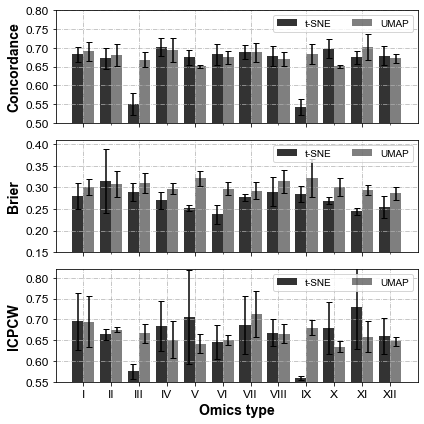

In [372]:
plt.rc('font', family='Arial')
fig, ax = plt.subplots(3, figsize=(6,6), sharey=False)

x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

# Concordance
rects1 = ax[0].bar(x - width/2, concordance[0], width, label='t-SNE', color='black', alpha=0.8, yerr=concordance_tsne_std, capsize=3)
rects2 = ax[0].bar(x + width/2, concordance[1], width, label='UMAP', color='black', alpha=0.5, yerr=concordance_umap_std, capsize=3)
ax[0].set_ylim([0.5,0.80])
ax[0].set_yticks(np.arange(0.5, 0.80, 0.05))
ax[0].set_ylabel('Concordance', fontsize=14, fontweight='bold')
ax[0].set_xticklabels([])
ax[0].set_xticks(np.arange(len(labels)), labels)
ax[0].tick_params(axis="y", labelsize=12) 
ax[0].legend(ncol=2)
ax[0].grid(linestyle='-.', linewidth=0.7)

# Brier
rects1 = ax[1].bar(x - width/2, brier[0], width, label='t-SNE', color='black', alpha=0.8, yerr=brier_tsne_std, capsize=3)
rects2 = ax[1].bar(x + width/2, brier[1], width, label='UMAP', color='black', alpha=0.5, yerr=brier_umap_std, capsize=3)
ax[1].set_ylim([0.15,0.41])
ax[1].set_yticks(np.arange(0.15, 0.41, 0.05))
ax[1].set_ylabel('Brier', fontsize=14, fontweight='bold')
ax[1].set_xticklabels([])
ax[1].set_xticks(np.arange(len(labels)), labels)
ax[1].tick_params(axis="y", labelsize=12) 
ax[1].legend(ncol=2, loc='upper right')
ax[1].grid(linestyle='-.', linewidth=0.7)

# IPCW
rects1 = ax[2].bar(x - width/2, ipcw[0], width, label='t-SNE', color='black', alpha=0.8, yerr=ipcw_tsne_std, capsize=3)
rects2 = ax[2].bar(x + width/2, ipcw[1], width, label='UMAP', color='black', alpha=0.5, yerr=ipcw_umap_std, capsize=3)
ax[2].set_ylim([0.55,0.82])
ax[2].set_yticks(np.arange(0.55, 0.82, 0.05))
ax[2].tick_params(axis="x", labelsize=12)
ax[2].set_ylabel('ICPCW', fontsize=14, fontweight='bold')
ax[2].set_xlabel('Omics type', fontsize=14, fontweight='bold')
ax[2].tick_params(axis="y", labelsize=12) 
ax[2].legend(ncol=2)
ax[2].set_xticks(np.arange(len(labels)))
ax[2].set_xticklabels(labels)
ax[2].grid(linestyle='-.', linewidth=0.7)

plt.tight_layout()
plt.savefig('plots/comparision_tsne_umap.png', dpi=1000)

In [341]:
# For comparision between survCNN and others
concordance_survCNN, concordance_RF, concordance_cox, concordance_coxnnet = [], [], [], []
concordance_survCNN_std, concordance_RF_std, concordance_cox_std, concordance_coxnnet_std= [], [], [], []

labels = ['I','II','III','IV','V','VI','VII','VIII','IX','X','XI','XII']
for omics in list(tsne_PH_dropout_results):
    concordance_survCNN.append(np.mean(tsne_PH_dropout_results[omics]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    concordance_survCNN_std.append(np.std(tsne_PH_dropout_results[omics]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5]))
for omics in list(RF):
    concordance_RF.append(np.mean(RF[omics].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    concordance_RF_std.append(np.std(RF[omics].sort_values(ascending = False).reset_index(drop=True)[0:5]))
for omics in list(cox):
    concordance_cox.append(np.mean(cox[omics].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    concordance_cox_std.append(np.std(cox[omics].sort_values(ascending = False).reset_index(drop=True)[0:5]))
for omics in list(coxnnet):
    concordance_coxnnet.append(np.mean(coxnnet[omics].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    concordance_coxnnet_std.append(np.std(coxnnet[omics].sort_values(ascending = False).reset_index(drop=True)[0:5]))

concordance = [concordance_survCNN, concordance_RF, concordance_cox, concordance_coxnnet]

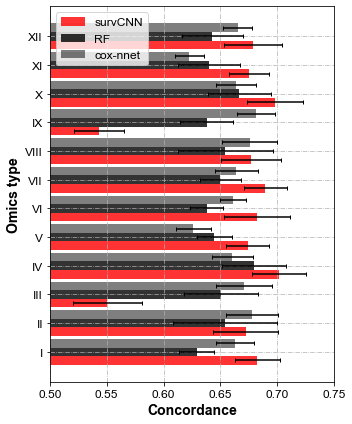

In [344]:
plt.rc('font', family='Arial')
fig, ax = plt.subplots(1, figsize=(5,6), sharey=False)

x = np.arange(len(labels))  # the label locations
width = 0.30  # the width of the bars

rects1 = ax.barh(x - width, concordance[0], width, label='survCNN', color='red', alpha=0.8, xerr=concordance_survCNN_std,capsize=2)
rects2 = ax.barh(x, concordance[1], width, label='RF', color='black', alpha=0.8, xerr=concordance_RF_std,capsize=2)
rects2 = ax.barh(x + width, concordance[3], width, label='cox-nnet', color='black', alpha=0.5, xerr=concordance_coxnnet_std,capsize=2)
ax.set_xlim([0.5,0.75])
ax.set_xticks(np.arange(0.5, 0.76, 0.05))
ax.set_xlabel('Concordance', fontsize=14, fontweight='bold')
ax.set_ylabel('Omics type', fontsize=14, fontweight='bold')
ax.set_yticklabels([])
ax.set_yticks(np.arange(len(labels)), labels)
ax.tick_params(axis="x", labelsize=12) 
ax.tick_params(axis="y", labelsize=12) 
ax.legend(ncol=1, fontsize=12)
ax.grid(linestyle='-.', linewidth=0.7)
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)

plt.tight_layout()
plt.savefig('plots/comparision_survcnn-others.png', dpi=1000)

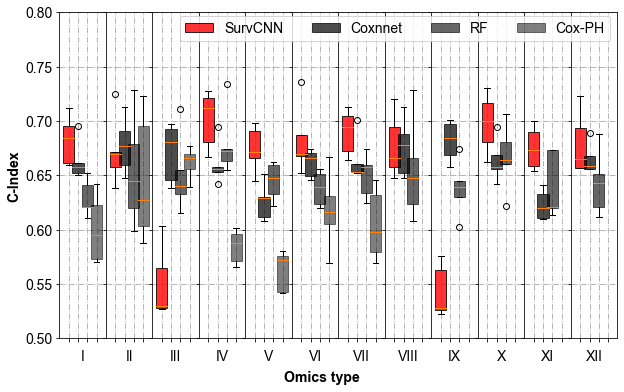

In [368]:
# SECTION III: COMPARISION
RF = pd.read_excel('simulation_results\RF.xlsx')
cox = pd.read_excel('simulation_results\cox.xlsx')
coxnnet = pd.read_excel('simulation_results\coxnnet.xlsx')
plt.rc('font', family='Arial')
fig, axes = plt.subplots(ncols=12, sharey=True, figsize=(10,6))
fig.subplots_adjust(wspace=0)
#fig.suptitle('5-fold cross-validated '+type+' model results 10CV',fontweight = 'bold',  fontsize=16, y = 0.92)
#fig.suptitle(str(cv)+'-fold cross-validated testing results',fontweight = 'bold',  fontsize=16, y = 0.93)

axes[0].set_ylabel('C-Index', fontsize = 14, fontweight='bold')

# labels = ['mrna',
#     'meth',
#     'mirna',
#     'mrna\n+\nmeth',
#     'mrna\n+\nmirna',
#     'mrna\n+\nmeth\n+\nmirna',
#     'mrna\n+\nclin',
#     'meth\n+\nclin',
#     'mirna\n+\nclin',
#     'mrna\n+\nmeth\n+\nclin',
#     'mrna\n+\nmirna\n+\nclin',
#     'mrna\n+\nmeth\n+\nmirna\n+\nclin']

for ax, index1, index2, index3, label in zip(axes, list(tsne_PH_dropout_results), list(RF), list(cox), labels):
    a = np.append([tsne_PH_dropout_results[index1]['ConcValBm'].sort_values(ascending=False).reset_index(drop=True)[0:5],coxnnet[index2].sort_values(ascending=False).reset_index(drop=True)[0:5]],[RF[index3].sort_values(ascending=False).reset_index(drop=True)[0:5]], axis=0)

    a = np.append(a, [cox[index3].sort_values(ascending=False).reset_index(drop=True)[0:5]], axis=0)

    box1 = ax.boxplot(a.tolist(), positions= [0.5,1.0,1.5, 2.0], widths=0.6, patch_artist=True)
    colors1 = ['red','black','black', 'black']
    alphas = [0.8, 0.7, 0.6, 0.5]
    # colors2 = ['blueviolet', 'blueviolet']
    for patch1, color1, alpha in zip(box1['boxes'], colors1, alphas):
        patch1.set_facecolor(color1)
        patch1.set_alpha(alpha)

    #ax.text(0.5, 0.9, label)
    ax.set_xticklabels([])
    ax.margins(0.05)
    ax.tick_params(axis="x", labelsize=12)
    ax.tick_params(axis="y", labelsize=14) 
    ax.set_yticks(np.arange(0.5, 0.8, 0.05))
    ax.grid(linestyle='-.', linewidth=0.9)
    ax.set_ylim([0.5,0.8])
    ax.set_xlabel(label, fontsize = 14)
ax.legend([box1["boxes"][0], box1["boxes"][1], box1["boxes"][2], box1["boxes"][3]], ['SurvCNN', 'Coxnnet', 'RF', 'Cox-PH'], bbox_to_anchor=(1, 1.02, 0, -0.01),ncol=4, prop={'size': 14})
axes[5].text(-0.45, 0.46, 'Omics type', fontsize=14, fontweight='bold')
fig.savefig('plots/validation_'+str(10)+'CV_.png', format = 'png', dpi = 1200, bbox_inches='tight')
plt.show()

In [94]:
# T-test comparisions
t_test = []
p_value = []
for omics in list(RF):
    print(omics)
    print(stats.ttest_rel(tsne_PH_dropout_results['tsne_'+omics]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5], coxnnet[omics].sort_values(ascending = False).reset_index(drop=True)[0:5])[0])
    print(stats.ttest_rel(tsne_PH_dropout_results['tsne_'+omics]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:5], coxnnet[omics].sort_values(ascending = False).reset_index(drop=True)[0:5])[1])
    t_test.append(result[0])
    p_value.append(result[1])

mrna
3.957418590492051
0.016713743886147003
meth
-1.096255137379614
0.3345371361530755
mirna
-12.680682044149227
0.00022273392940194968
mrna_meth
5.231249877974329
0.006378237147753817
mrna_mirna
11.586039584020531
0.0003170623365671862
mrna_meth_mirna
2.024561715860706
0.11290955105438823
mrna_clinical
3.6362811596451876
0.022037018929260046
meth_clinical
0.44098459939651274
0.6820109553003377
mirna_clinical
-26.86975944413794
1.140503308428265e-05
mrna_meth_clinical
6.608466151669892
0.0027176795902058874
mrna_mirna_clinical
19.10243427263389
4.424898831397195e-05
mrna_meth_mirna_clinical
1.9749207188378248
0.11949426511445324


In [97]:
for omics in list(RF):
    print(omics)
    print(np.mean(cox[omics].sort_values(ascending = False).reset_index(drop=True)[0:5]))
    print()

mrna
0.6003110317161447

meth
0.647152805178859

mirna
0.6613904102802558

mrna_meth
0.584370511753372

mrna_mirna
0.5624750422436294

mrna_meth_mirna
0.6174574526237636

mrna_clinical
0.6046975150907374

meth_clinical
0.0

mirna_clinical
0.0

mrna_meth_clinical
0.0

mrna_mirna_clinical
0.0

mrna_meth_mirna_clinical
0.0



In [ ]:
# SECTION IV: ANALYSE IMAGES VIA SAVED CNN 

In [374]:
# Details of the model to analyse
ALGO, OMICS, PH, RANDOM = 'tsne', 'mrna_meth', 'PH', 9
obj = PHOTOMICS(OMICS, PH=True, clinical=True)

In [375]:
# Prepare data for inference
clinical = pd.read_csv('data/clinical_data_subsets/clinical_data.csv')
dataset_mrna, dataset_meth, dataset_mirna, training_list = obj.input_process1(ALGO+'_training_data_mrna', ALGO+'_training_data_meth',ALGO+'_training_data_mirna')
print(len(dataset_meth),'|', len(dataset_mirna),'|', len(dataset_mrna))
t, f, sample, age, breaks, n_intervals, y_train_array, indices, rand_range = obj.input_process2(training_list, clinical)
clinical_feat, train_id_clinical = obj.process3(clinical, training_list)

# Set model parameters
random = 0
seed(123)
tf.random.set_random_seed(123)
indices = range(len(f))
split_ratio = 0.2
batch_size = 8

Data processing-I...
mRNA_meth common patients:454
100 images to array
200 images to array
300 images to array
400 images to array
All mrna_meth images done!
454|454|454
Data processing-II...
100%|██████████| 454/454 [01:43<00:00,  4.38it/s]
Done!

Processing clinical features
100%|██████████| 454/454 [00:00<00:00, 26646.53it/s]
Features Processed


In [35]:
# clinical = clinical.set_index(clinical['sample'])
# clinical = clinical.drop(['sample'], axis=1)

# from collections import Counter     
# print(len(train_id_clinical))
# print('Mean:', np.median(clinical.loc[train_id_clinical]['age']))
# print('min:', np.min(clinical.loc[train_id_clinical]['age']))
# print('max:', np.max(clinical.loc[train_id_clinical]['age']))
# print('mean:', np.median(clinical.loc[train_id_clinical]['os_time']))
# print('min:', np.min(clinical.loc[train_id_clinical]['os_time']))
# print('max:', np.max(clinical.loc[train_id_clinical]['os_time']))
# print(Counter(clinical.loc[train_id_clinical]['vital_status']))

In [376]:
# Test-train split
X_train_mrna, X_test_mrna, y_train, y_test, ind_train_1, ind_test_1 = train_test_split(dataset_mrna, y_train_array,indices, test_size=split_ratio, random_state=random)
X_train_meth, X_test_meth, y_train, y_test, ind_train_2, ind_test_2 = train_test_split(dataset_meth, y_train_array,indices, test_size=split_ratio, random_state=random)
X_train_mirna, X_test_mirna, y_train, y_test, ind_train_2, ind_test_2 = train_test_split(dataset_mirna, y_train_array,indices, test_size=split_ratio, random_state=random)
clinical_train, clinical_test, placeholder_train, placeholder_test, ind_train, ind_test = train_test_split(clinical_feat, y_train_array, indices, test_size=split_ratio, random_state=random)

T_train, T_test, F_train, F_test, TF_ind_train, TF_ind_test = train_test_split(t, f, indices, test_size=split_ratio, random_state=random)

train_omics_data = [X_train_mrna, X_train_meth]
test_omics_data = [X_test_mrna, X_test_meth]

# if PH=='PH':
#     cox_bm = load_model('checkpoints/'+PH+'/'+ALGO+'_'+OMICS+'_clinical/two_dense_weights-improvement-'+str(random)+'.hdf5', custom_objects={'PropHazards': nnet_survival.PropHazards(n_intervals), 'loss': nnet_survival.surv_likelihood(n_intervals)})
# elif PH=="non-PH":
#     cox_bm = load_model('checkpoints/'+PH+'/'+ALGO+'_'+OMICS+'_clinical/two_dense_weights-improvement-'+str(random)+'.hdf5', custom_objects={'loss': nnet_survival.surv_likelihood(n_intervals)})

cox_bm = load_model('data/checkpoints/'+ALGO+'_dropout_'+OMICS+'/two_dense_weights-improvement-'+str(RANDOM)+'.hdf5', custom_objects={'PropHazards': nnet_survival.PropHazards(n_intervals), 'loss': nnet_survival.surv_likelihood(n_intervals)})
y_pred_bm, y_pred_val_bm = obj.train_val_results(cox_bm, train_omics_data, test_omics_data, batch_size)
five_year_survival_prob_bm, five_year_survival_prob_val_bm, five_yr_median_bm, five_yr_median_val_bm = obj.surv_prob(y_pred_bm, y_pred_val_bm, breaks, 5)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



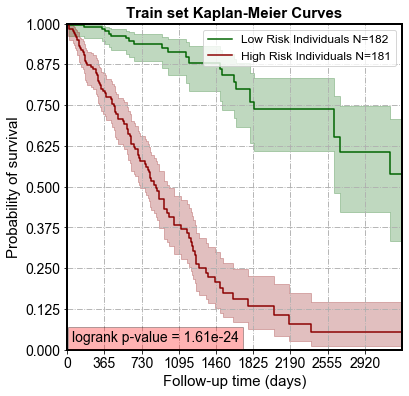

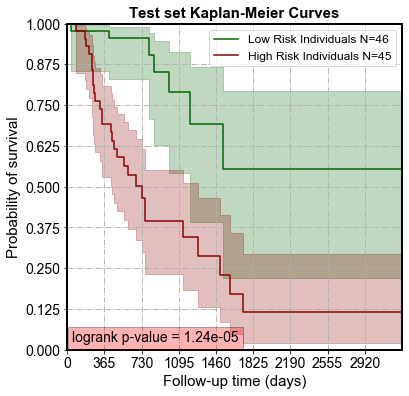

In [377]:
obj_analysis = VISHLESHAN()
obj_analysis.plotKM(T_train ,five_year_survival_prob_bm, F_train, 5, 'Train', five_yr_median_bm, breaks)
obj_analysis.plotKM(T_test ,five_year_survival_prob_val_bm, F_test, 5, 'Test', five_yr_median_val_bm, breaks)

In [378]:
# Extract patient IDs for dichotomized classes of patients
T1_train, T2_train, E1_train, E2_train, p_train = obj_analysis.dichot(T_train, F_train, five_year_survival_prob_bm, five_yr_median_bm)
T1_test, T2_test, E1_test, E2_test, p_test = obj_analysis.dichot(T_test, F_test, five_year_survival_prob_val_bm, five_yr_median_val_bm)

T1_train_index = [TF_ind_train[T_train.tolist().index(i)] for i in T1_train]
T2_train_index = [TF_ind_train[T_train.tolist().index(i)] for i in T2_train]
T1_test_index = [TF_ind_test[T_test.tolist().index(i)] for i in T1_test]
T2_test_index = [TF_ind_test[T_test.tolist().index(i)] for i in T2_test]

sample_T1_train =  [sample[i] for i in T1_train_index]
sample_T2_train =  [sample[i] for i in T2_train_index]
sample_T1_test =  [sample[i] for i in T1_test_index]
sample_T2_test =  [sample[i] for i in T2_test_index]

# Sanity check
len(sample_T1_train) + len(sample_T2_train)+len(sample_T1_test) + len(sample_T2_test)

454

In [384]:
import pickle
def save_obj(obj, name):
    with open(name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

dict = {'t1_train':sample_T1_train,'t2_train':sample_T2_train,'t1_test':sample_T1_test,'t2_test':sample_T2_test}
save_obj(dict, 'risk_ids.pkl')

In [45]:
def predictability(classList, clinical, type):
    litmus = clinical[['sample','vital_status']]
    litmus = litmus.set_index(litmus['sample'])
    litmus.drop('sample', axis=1)
    count = 0
    if type=='high_risk':
        event=1
    elif type=='low_risk':
        event=0
    for patient in classList:
        for p in litmus.index:
            if patient==p and litmus.loc[p].tolist()[1]==event:
                count = count+1    
    return count

In [46]:
correct_dead_train = predictability(sample_T2_train, clinical, 'high_risk')
correct_alive_train = predictability(sample_T1_train, clinical, 'low_risk')
correct_dead_test = predictability(sample_T2_test, clinical, 'high_risk')
correct_alive_test = predictability(sample_T1_test, clinical, 'low_risk')

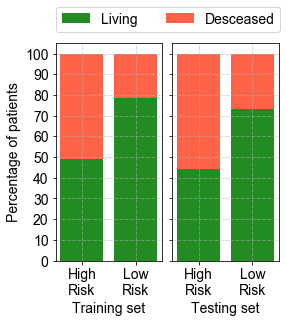

In [13]:
plt.rc('font', family='Arial')
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(4,4))

labels = ['High Risk', 'Low risk']

correct_alive_train_per=(correct_alive_train/len(sample_T2_train))*100
correct_dead_train_per=(correct_dead_train/len(sample_T2_train))*100
correct_alive_test_per=(correct_alive_test/len(sample_T2_test))*100
correct_dead_test_per=(correct_dead_test/len(sample_T2_test))*100

incorrect_train = [correct_dead_train_per, 100-correct_alive_train_per]
correct_train = [100-correct_dead_train_per, correct_alive_train_per]

incorrect_test = [correct_dead_test_per, 100-correct_alive_test_per]
correct_test = [100-correct_dead_test_per, correct_alive_test_per]

width = 0.3      # the width of the bars: can also be len(x) sequence

ind = np.arange(2)

ax1.bar(labels, correct_train, label='Living', color='forestgreen')
ax1.bar(labels, incorrect_train, label='Desceased', bottom=correct_train ,color='tomato')
ax2.bar(labels, correct_test, label='Living', color='forestgreen')
ax2.bar(labels, incorrect_test,bottom=correct_test, label='Desceased', color='tomato')

ax1.set_ylabel('Percentage of patients', fontsize=14)
ax1.set_xlabel('Training set', fontsize=14)
ax1.set_xticklabels(['High\nRisk', 'Low\nRisk'])
ax1.set_yticks(np.arange(0, 101, 10))
ax1.grid(linestyle='-.', linewidth=0.5)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.legend(ncol=2,bbox_to_anchor=(2.18, 1.2),fontsize=14)

#ax2.set_ylabel('Percentage of patients', fontsize=14)
ax2.set_xlabel('Testing set', fontsize=14)
ax2.grid(linestyle='-.', linewidth=0.5)
ax2.set_xticklabels(['High\nRisk', 'Low\nRisk'])
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
plt.subplots_adjust(wspace=0.1)

#plt.tight_layout()
#fig.savefig('plots/predictability_'+ALGO+'_'+OMICS+'_'+PH+'.png', format = 'png', dpi = 1200, bbox_inches='tight')
plt.show()

In [43]:
diff_train = np.subtract(obj_analysis.average_pix(sample_T1_train, 'data/data_px/tsne_mrna_datapx/'), obj_analysis.average_pix(sample_T2_train, 'data/data_px/tsne_mrna_datapx/'))
diff_test = np.subtract(obj_analysis.average_pix(sample_T1_test, 'data/data_px/tsne_mrna_datapx/'), obj_analysis.average_pix(sample_T2_test, 'data/data_px/tsne_mrna_datapx/'))

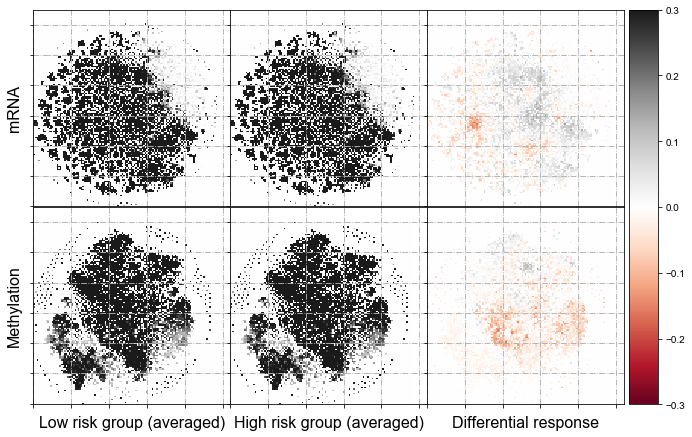

In [14]:
# MRNA+METH

plt.rc('font', family='Arial')
fig, ax = plt.subplots(2, 3, figsize=(8,10))
#fig.suptitle('Differential gene expression among dichotomized patients', x = 0.68, fontsize = 14, fontweight = 1000)

a1 = ax[0,0].imshow(obj_analysis.average_pix(sample_T1_train, 'data/data_px/tsne_mrna_datapx/'), cmap = 'RdGy', interpolation='None')
a2 = ax[0,1].imshow(obj_analysis.average_pix(sample_T2_train, 'data/data_px/tsne_mrna_datapx/'), cmap = 'RdGy', interpolation='None')
im1 = ax[0,2].imshow(np.subtract(obj_analysis.average_pix(sample_T1_train, 'data/data_px/tsne_mrna_datapx/'), obj_analysis.average_pix(sample_T2_train, 'data/data_px/tsne_mrna_datapx/')), cmap = 'RdGy', interpolation='None')

b1 = ax[1,0].imshow(obj_analysis.average_pix(sample_T1_train, 'data/data_px/tsne_meth_datapx/'), cmap = 'RdGy', interpolation='None')
b2 = ax[1,1].imshow(obj_analysis.average_pix(sample_T2_train, 'data/data_px/tsne_meth_datapx/'), cmap = 'RdGy', interpolation='None')
im2 = ax[1,2].imshow(np.subtract(obj_analysis.average_pix(sample_T1_train, 'data/data_px/tsne_meth_datapx/'), obj_analysis.average_pix(sample_T2_train, 'data/data_px/tsne_meth_datapx/')), cmap = 'RdGy', interpolation='None')

# ax1.set_title('Low-risk patients (averaged)', y = -0.2, fontsize=14)
# ax2.set_title('High-risk patients (averaged)', y = -0.2, fontsize=14)
# ax3.set_title('Differential expression', y = -0.2, fontsize=14)

fig.subplots_adjust(right= 1.15)
cbar_ax = fig.add_axes([1.16, 0.228, 0.05, 0.548])

for axis in ax.flatten():
    axis.set_xlim(0,130)
    axis.set_ylim(0,130)
    axis.set_yticklabels([])
    axis.set_xticklabels([])
    axis.grid(linestyle='-.', linewidth=0.9)
    axis.grid(linestyle='-.', linewidth=0.9)
    axis.grid(linestyle='-.', linewidth=0.9)

ax[0,0].set_ylabel('mRNA', fontsize=16)
ax[1,0].set_ylabel('Methylation', fontsize=16)
ax[1,0].set_xlabel('Low risk group (averaged)', fontsize=16)
ax[1,1].set_xlabel('High risk group (averaged)', fontsize=16)
ax[1,2].set_xlabel('Differential response', fontsize=16)

im1.set_clim(-0.3,0.3)
im2.set_clim(-0.3,0.3)
a1.set_clim(-0.3,0.3)
a2.set_clim(-0.3,0.3)
b1.set_clim(-0.3,0.3)
b2.set_clim(-0.3,0.3)

plt.subplots_adjust(wspace=0, hspace=-0.43)
fig.colorbar(im2, cax=cbar_ax)

fig.savefig('plots/differential_'+ALGO+'_'+OMICS+'_'+PH+'.png', format = 'png', dpi = 1200, bbox_inches='tight')

In [19]:
# MRNA+METH+MIRNA

plt.rc('font', family='Arial')
fig, ax = plt.subplots(3, 3, figsize=(8,10))
#fig.suptitle('Differential gene expression among dichotomized patients', x = 0.68, fontsize = 14, fontweight = 1000)

a1 = ax[0,0].imshow(obj_analysis.average_pix(sample_T1_train, 'data/data_px/tsne_mrna_datapx/'), cmap = 'RdGy', interpolation='None')
a2 = ax[0,1].imshow(obj_analysis.average_pix(sample_T2_train, 'data/data_px/tsne_mrna_datapx/'), cmap = 'RdGy', interpolation='None')
im1 = ax[0,2].imshow(np.subtract(obj_analysis.average_pix(sample_T1_train, 'data/data_px/tsne_mrna_datapx/'), obj_analysis.average_pix(sample_T2_train, 'data/data_px/tsne_mrna_datapx/')), cmap = 'RdGy', interpolation='None')

b1 = ax[1,0].imshow(obj_analysis.average_pix(sample_T1_train, 'data/data_px/tsne_meth_datapx/'), cmap = 'RdGy', interpolation='None')
b2 = ax[1,1].imshow(obj_analysis.average_pix(sample_T2_train, 'data/data_px/tsne_meth_datapx/'), cmap = 'RdGy', interpolation='None')
im2 = ax[1,2].imshow(np.subtract(obj_analysis.average_pix(sample_T1_train, 'data/data_px/tsne_meth_datapx/'), obj_analysis.average_pix(sample_T2_train, 'data/data_px/tsne_meth_datapx/')), cmap = 'RdGy', interpolation='None')

c1 = ax[2,0].imshow(obj_analysis.average_pix(sample_T1_train, 'data/data_px/tsne_mirna_datapx/'), cmap = 'RdGy', interpolation='None')
c2 = ax[2,1].imshow(obj_analysis.average_pix(sample_T2_train, 'data/data_px/tsne_mirna_datapx/'), cmap = 'RdGy', interpolation='None')
im3 = ax[2,2].imshow(np.subtract(obj_analysis.average_pix(sample_T1_train, 'data/data_px/tsne_mirna_datapx/'), obj_analysis.average_pix(sample_T2_train, 'data/data_px/tsne_mirna_datapx/')), cmap = 'RdGy', interpolation='None')

# ax1.set_title('Low-risk patients (averaged)', y = -0.2, fontsize=14)
# ax2.set_title('High-risk patients (averaged)', y = -0.2, fontsize=14)
# ax3.set_title('Differential expression', y = -0.2, fontsize=14)

fig.subplots_adjust(right= 1.15)
cbar_ax = fig.add_axes([1.13, 0.123, 0.05, 0.759])

for axis in ax.flatten():
    axis.set_xlim(0,130)
    axis.set_ylim(0,130)
    axis.set_yticklabels([])
    axis.set_xticklabels([])
    axis.grid(linestyle='-.', linewidth=0.9)
    axis.grid(linestyle='-.', linewidth=0.9)
    axis.grid(linestyle='-.', linewidth=0.9)

ax[0,0].set_ylabel('mRNA', fontsize=14)
ax[1,0].set_ylabel('Methylation', fontsize=14)
ax[2,0].set_ylabel('miRNA', fontsize=14)
ax[2,0].set_xlabel('Low risk group (averaged)', fontsize=14)
ax[2,1].set_xlabel('High risk group (averaged)', fontsize=14)
ax[2,2].set_xlabel('Differential response', fontsize=14)

ax[2,0].set_ylim(0,50)
ax[2,0].set_xlim(0,50)
ax[2,1].set_ylim(0,50)
ax[2,1].set_xlim(0,50)
ax[2,2].set_ylim(0,50)
ax[2,2].set_xlim(0,50)

im1.set_clim(-0.3,0.3)
im2.set_clim(-0.3,0.3)
im3.set_clim(-0.3,0.3)
a1.set_clim(-0.3,0.3)
a2.set_clim(-0.3,0.3)
b1.set_clim(-0.3,0.3)
b2.set_clim(-0.3,0.3)
c1.set_clim(-0.3,0.3)
c2.set_clim(-0.3,0.3)

plt.subplots_adjust(wspace=-0.15, hspace=0.05)
fig.colorbar(im3, cax=cbar_ax)

fig.savefig('plots/differential_'+ALGO+'_'+OMICS+'_'+PH+'.png', format = 'png', dpi = 1200, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: 'data/data_px/tsne_mirna_datapx/TCGA-NJ-A4YQ-01.npy'

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Differential gene expression among dichotomized patients', x = 0.68, fontsize = 14, fontweight = 1000)

im1 = ax1.imshow(diff_train, cmap = 'RdGy', interpolation='None')
im2 = ax2.imshow(diff_test, cmap = 'RdGy', interpolation='None')

ax1.set_title('Training impression', y = -0.2, fontsize=14)
ax2.set_title('Testing impression', y = -0.2, fontsize=14)
fig.subplots_adjust(right= 1.15)
cbar_ax = fig.add_axes([1.14, 0.125, 0.05, 0.755])

ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xlim(0,123)
ax1.set_ylim(0,123)
ax2.set_xlim(0,123)
ax2.set_ylim(0,123)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

ax1.grid(linestyle='-.', linewidth=0.9)
ax2.grid(linestyle='-.', linewidth=0.9)

im1.set_clim(-0.3,0.3)
im2.set_clim(-0.3,0.3)

plt.subplots_adjust(wspace=-0.1)

fig.colorbar(im1, cax=cbar_ax)
fig.savefig('plots/differential_'+ALGO+'_'+OMICS+'_'+PH+'.png', format = 'png', dpi = 1200, bbox_inches='tight')

In [48]:
# Extract pixel coorinates to map genes using DEEPINSIGHT algo
pix_subset, unique_coord = obj_analysis.deepinsight('data/data_px/mrna_tsne_5___cosine.csv')

In [49]:
# For image with only cancer genes
color_idx = pd.read_csv("data/color_idx_mrna.csv")
final_df = pd.read_csv("data/data_px/mrna_tsne_5___cosine.csv")

#final_df = final_df.drop('c', axis =1)
final_df = pd.concat([final_df, color_idx], axis=1)
final_df.columns = ['a', 'b', 'c']

df2= pd.concat([pix_subset, final_df['c']], axis = 1)
df2 = df2.loc[df2['c']>=2] 
df3 = df2.drop(['c'], axis = 1)

df3_a = df3['pix-tsne-2d-one'].values
df3_b = df3['pix-tsne-2d-two'].values

unique_coord_C = obj_analysis.getOverlappingGeneID(df3)

In [50]:
# Replace gene indices with gene names for every pixel coordinate
def replace(gene_dict, source):
    for key, value in gene_dict.items():
        for i in range(13):
            try:
                value[i] = source[value[i]]
            except:
                pass    
    return gene_dict

mrna_genelist =  pd.read_csv('data/clean_datasets/mrna_clean.csv')['Gene']
gene_coord = replace(unique_coord, mrna_genelist)
gene_coord_C = replace(unique_coord_C, mrna_genelist)

In [51]:
# Extract the coordinates of diffrentially expressed genes
diff_locs_pos = np.argwhere(diff_train > 0.1)
diff_locs_neg = np.argwhere(diff_train < -0.1)

# Extract genes on the diffrentially expressed coordinates
def diffGenes(diff_locs, gene_coord):
    dict = {}
    count = 0
    for locs in diff_locs:
        try:
            print(gene_coord[tuple(locs)])
            dict[tuple(locs)] = gene_coord[tuple(locs)]
            count = count+1
        except:
            pass
    print(count)
    return dict

In [65]:
gene_set_pos = diffGenes(diff_locs_pos, gene_coord)
gene_list_pos=[]
for key in gene_set_pos:
    gene_list_pos.append(gene_set_pos[key])
gene_list_pos=[item for sublist in gene_list_pos for item in sublist]

# f=open('gene_list_pos.txt','w')
# s1='\n'.join(gene_list_pos)
# f.write(s1)
# f.close()

# import pickle
# a_file = open("gene_set_neg.pkl", "wb")
# pickle.dump(gene_set_neg, a_file)
# a_file.close()

# # import pickle
# # file = open("gene_set_pos.pkl", "rb")
# # output = pickle.load(file)

['BCHE', 'CORO2B', 'ELMOD1', 'WNT2B']
['IL28RA', 'LEFTY1', 'LEFTY2']
['ARHGEF37', 'PAX6']
['CACNA1S', 'SH3GL3', 'SPHKAP', 'SYN2']
['LOC401093', 'MBNL1', 'TMEM14E']
['NPR1', 'SLC27A3']
['BTBD9', 'STXBP1', 'TAPT1', 'ZNF238']
['ACOXL', 'AMIGO1', 'ESYT3', 'LONRF2', 'MYLIP', 'PLCH1', 'SLC47A1']
['GPD1L']
['FLJ35024', 'VLDLR']
['FLG2', 'FLG', 'HRNR', 'IFNA5']
['C2orf58', 'FAM82A1', 'HNMT', 'PUS10', 'TMEM50B']
['CCNJL', 'KCNS3', 'STK32A']
['CTSE', 'PDE4C']
['LRRK2', 'SDR16C5', 'SERPIND1', 'SFTPA1', 'SFTPA2', 'SLC2A13', 'SLC39A8', 'TMEM90A', 'ZNF385B']
['ARRB1', 'PCP4L1', 'SYTL3']
['C16orf89', 'C7orf41', 'ENTPD3', 'GLS2', 'SLC6A18', 'SMARCD3', 'TMEM163']
['NPC2']
['FNDC5', 'SHE', 'TDRD10', 'ZNF541']
['ADAM29', 'GLRA3', 'KHDRBS2']
['LIMCH1', 'MYOM1', 'PLA2G4F', 'SPIRE1']
['ACADSB', 'AFF3', 'ATP8A1', 'CACNA2D2', 'ITPKB', 'RICH2', 'SFXN2', 'TMEM108', 'TMEM132D']
['CACNB4', 'LRRC36', 'SLC1A2']
['FUT6']
['B3GNT9', 'CD81', 'CDKN1C', 'CST3', 'GPRC5C', 'SLC12A4']
['CCDC85A', 'FAM189A2', 'FHDC1', 'PRKC

In [67]:
print(len(gene_list_pos))
len(gene_list_neg)

236


173

In [2]:
# Import enrichr results
def geneEnrichment(enricherOutput):
    diff_enrich = pd.read_csv(enricherOutput, sep="\t")

    # Prepare gene enrichment results for plotting
    list = []
    for i in range(len(diff_enrich)):
        list.append(diff_enrich.loc[i]['Genes'].split(';'))
    flat_list = [item for sublist in list for item in sublist]

    data = []
    for i in range(len(diff_enrich['Term'][:])):
        list = []
        for gene in set(flat_list):
            if gene in diff_enrich['Genes'][i]:
                #print(diff_pos_enrich['P-value'][i])
                list.append(diff_enrich['P-value'][i])
            else:
                list.append(0)
        data.append(list)
    data = pd.DataFrame(data)
    data.columns=set(flat_list)
    data = data.set_index(diff_enrich['Term'][:])
    return data

In [5]:
diff_enrich = pd.read_csv('data/enrichr_results/tsne_mrna_PH_enrichr_cellType_neg.txt', sep="\t")

In [1]:
data = geneEnrichment('data/enrichr_results/tsne_mrna_PH_enrichr_cellType_neg.txt')

NameError: name 'geneEnrichment' is not defined

In [ ]:
data = data.iloc[0:10]

In [ ]:
data = data[['MCM4', 'PRKDC', 'CHEK1', 'CCNA2','CDK1', 'CCNB2','CCNE2','CDK2','ANAPC5','MAD2L1','PTTG1','PLK1','BUB1','CDC25C','FEN1','POLE2','RFC3','RFC5','PFKM','HK2']]

In [ ]:
data[0:10]

In [ ]:
# Set up the matplotlib figure
ax = sns.clustermap(data,figsize=(8,10), cmap='PuRd',linewidths=0.5, linecolor='black',cbar=True)
#ax.axhline(y=0, color='k',linewidth=10)

In [ ]:
c = np.zeros((123, 123))
for key, value in gene_coord_C.items():
    c[key[0]][key[1]] = diff_train[key]

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,4))
fig.suptitle('122px * 122px image representation of differential expression', y=0.98, x = 0.64, fontsize = 13, fontweight = 1000)

im1 = ax2.imshow(diff_train, cmap = 'RdGy', interpolation='None')
im2 = ax1.scatter(df2['pix-tsne-2d-one'], df2['pix-tsne-2d-two'], alpha=0.60, c= df2['c'], cmap='tab10')

ax2.set_title('All Genes (image)', y = -0.2)
ax1.set_title('Cancer Genes (image)', y = -0.2)
ax1.set_ylim(0,123)
ax1.set_xlim(0,123)
ax1.legend()
fig.subplots_adjust(right= 1.15)
cbar_ax = fig.add_axes([1.2, 0.15, 0.05, 0.7])

ax2.grid(linestyle='-.', linewidth=0.9)
ax1.grid(linestyle='-.', linewidth=0.9)

im1.set_clim(-0.3,0.3)
#im2.set_clim(-0.3,0.3)

fig.colorbar(im1, cax=cbar_ax)

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
fig.suptitle('122px * 122px image representation of differential expression', y=0.92, x = 0.64, fontsize = 13, fontweight = 1000)

im1 = ax1.imshow(diff_train, cmap = 'RdGy', interpolation='None')
im2 = ax2.imshow(c, cmap = 'RdGy', interpolation='None')

for key, value in gene_coord_C.items():
    if diff_train[key] < 0:
        text = ax2.text(key[1], key[0], value[0], fontsize=4, color = 'blue')
        #print(value[0])
    if diff_train[key] > 0:
        text = ax2.text(key[1], key[0], value[0], fontsize=4, color = 'red')

ax1.set_title('All Genes (image)', y = -0.2)
ax2.set_title('Cancer Genes (image)', y = -0.2)
fig.subplots_adjust(right= 1.15)
cbar_ax = fig.add_axes([1.2, 0.15, 0.05, 0.7])

ax1.grid(linestyle='-.', linewidth=0.9)
ax2.grid(linestyle='-.', linewidth=0.9)

im1.set_clim(-0.3,0.3)
im2.set_clim(-0.3,0.3)

fig.colorbar(im1, cax=cbar_ax)

In [ ]:
# import matplotlib
# def plotPerf(dict,type,cv):
#     plt.rc('font', family='consolas')
#     fig, axes = plt.subplots(ncols=12, sharey=True, figsize=(12,6))
#     fig.subplots_adjust(wspace=0)
#     fig.suptitle('5-fold cross-validated '+type+' model results 10CV',fontweight = 'bold',  fontsize=16, y = 0.92)

#     axes[0].set_ylabel('Value', fontsize = 14)

#     labels = ['mrna',
#     'meth',
#     'mirna',
#     'mrna\n+\nmeth',
#     'mrna\n+\nmirna',
#     'mrna\n+\nmeth\n+\nmirna',
#     'mrna\n+\nclin',
#     'mirna\n+\nclin',
#     'meth\n+\nclin',
#     'mrna\n+\nmeth\n+\nclin',
#     'mrna\n+\nmirna\n+\nclin',
#     'mrna\n+\nmeth\n+\nmirna\n+\nclin']

#     for ax, name, label in zip(axes, list(dict), labels):
#         box = ax.boxplot([dict[name][item].sort_values(ascending = False).reset_index(drop=True)[0:cv] if item=='ConcValBm' else dict[name][item].sort_values(ascending = True).reset_index(drop=True)[0:cv] for item in ['ConcValBm', 'BrierValBm']], widths = 0.6, patch_artist = True)
#         colors = ['limegreen', 'darkorchid']
#         for patch, color in zip(box['boxes'], colors):
#             patch.set_facecolor(color)
#         #ax.text(0.5, 0.9, label)
#         ax.set_xticklabels(['C-Index', 'Brier'], rotation=45)
#         ax.margins(0.05)
#         ax.tick_params(axis="x", labelsize=12)
#         ax.tick_params(axis="y", labelsize=12) 
#         ax.set_yticks(np.arange(0, 1, 0.1))
#         ax.grid(linestyle='-.', linewidth=0.9)
#         ax.set_ylim([0,1])
#         ax.set_xlabel(label, fontsize = 14, fontweight='bold')

#     transFigure = fig.transFigure.inverted()
#     coord=[0,0]
#     for i in range(len(list(dict))):
#         coord=np.vstack([coord,transFigure.transform(axes[i].transData.transform([1,np.median(dict[list(dict)[i]]['ConcValBm'].sort_values(ascending = False).reset_index(drop=True)[0:10])]))])

#     coord=np.delete(coord, 0, 0)
#     line1 = matplotlib.lines.Line2D((coord[0][0],coord[1][0]),(coord[0][1],coord[1][1]),transform=fig.transFigure)
#     line2 = matplotlib.lines.Line2D((coord[1][0],coord[2][0]),(coord[1][1],coord[2][1]),transform=fig.transFigure)
#     line3 = matplotlib.lines.Line2D((coord[2][0],coord[3][0]),(coord[2][1],coord[3][1]),transform=fig.transFigure)
#     line4 = matplotlib.lines.Line2D((coord[3][0],coord[4][0]),(coord[3][1],coord[4][1]),transform=fig.transFigure)
#     line5 = matplotlib.lines.Line2D((coord[4][0],coord[5][0]),(coord[4][1],coord[5][1]),transform=fig.transFigure)
#     # line6 = matplotlib.lines.Line2D((coord[5][0],coord[6][0]),(coord[5][1],coord[6][1]),transform=fig.transFigure)
#     # line7 = matplotlib.lines.Line2D((coord[6][0],coord[7][0]),(coord[6][1],coord[7][1]),transform=fig.transFigure)
#     # line8 = matplotlib.lines.Line2D((coord[7][0],coord[8][0]),(coord[7][1],coord[8][1]),transform=fig.transFigure)
#     # line9 = matplotlib.lines.Line2D((coord[8][0],coord[9][0]),(coord[8][1],coord[9][1]),transform=fig.transFigure)
#     # line10 = matplotlib.lines.Line2D((coord[9][0],coord[10][0]),(coord[9][1],coord[10][1]),transform=fig.transFigure)
#     # line11= matplotlib.lines.Line2D((coord[10][0],coord[11][0]),(coord[10][1],coord[11][1]),transform=fig.transFigure)

#     fig.lines = line1,line2,line3,line4,line5,
#     #line6,line7,line8,line9,line10,line11,

#     fig.savefig('plots/'+type+'_result_'+str(cv)+'CV.png', format = 'png', dpi = 1200, bbox_inches='tight')
#     plt.show()
#     return None

In [ ]:
plotPerf(tsne_nonPH_results, 'TSNE(non-PH)', 10)

In [ ]:
np.mean(tsne_PH_results['tsne_mrna']['BrierValBm'].sort_values(ascending = True).reset_index(drop=True)[0:5])